# We Rate Dogs (Twitter)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

**WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a ***denominator of 10.** 
>- **The numerators**, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. 
- **Why?** Because "they're good dogs Brent." 
- **WeRateDogs** has over 4 million followers and has received international media coverage.

In [809]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
from datetime import datetime
from io import BytesIO
import json

%matplotlib inline

## Data Wrangling

**We will have 3 Datasets,**
- One containing image predictions of the dogs with tweet id
- One with dog classification on the basis of type standards (doggo, floofer, pupper, puppo) with tweet id.
- And one will be gathered from the twitter api.

### Gather Data

- **Collecting data from the server.**

In [810]:
# Loading image predictions of dogs with type predictions and confidence intervals from the server using request method.
image_data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [811]:
# Loading the image predictions from the server using BytesIO 
image_predictions = pd.read_csv(BytesIO(image_data.content), sep = '\t')

In [812]:
# Dumping data into the tsv format on drive.
image_predictions.to_csv('image-predictions.tsv', sep='\t', )

- **Loading data from csv.**

In [813]:
# Loading twitter archives to get the tweet id's and type of dog classification by internet people. 
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

In [814]:
# Glimpse of twitter archive.
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- **Gathering data from twitter api.**

In [815]:
# Importing tweepy library
# Usually not included in anaconda so you have to install it.
# Can be installed using command : ``conda install -c conda-forge tweepy``
import tweepy

In [816]:
# Personal keys can't show refer to stackoverflow for how to do the stuff.
consumer_key = '******************************************************'
consumer_secret = '***************************************************'
access_token = '*******************************************************'
access_secret = '*****************************************************'

In [817]:
# Making connection to the twitter api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [408]:
# Reading tweets and associated data using the tweet id from the twitter archives.
# Dumping data to tweet_json.txt
# Storing the tweet id and error message related to it in a dictionary for further reference
# Printing the tweet id and error message associated if data is not available.
no_data_tweet_id = dict()
with open("tweet_json.txt", "w") as file: 
    for tweet_id in twitter_archives['tweet_id']: 
        try: 
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') 
            json.dump(tweet._json, file) 
            file.write("\n") 
        except Exception as e:
            no_data_tweet_id['str(tweet_id)'] = str(e)
            print(str(tweet_id) + " : " + no_data_tweet_id['str(tweet_id)'])

888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 : [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 : [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 : [{'code

Rate limit reached. Sleeping for: 90


754011816964026368 : [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 : [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 12


In [818]:
# reading from the json file and converting the data into pandas dataframe
tweet_data = []
with open('tweet_json.txt', 'r') as file:
    tweet_json = file.readline()
    while tweet_json:
        tweet_data.append(json.loads(tweet_json))
        tweet_json = file.readline()
api_data = pd.DataFrame(tweet_data)

### Access Data.

- **API Data**

In [819]:
api_data.shape

(2331, 32)

In [820]:
# Checking Dataset.
api_data.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1478,Tue Jan 26 17:50:29 +0000 2016,692041934689402880,692041934689402880,This is Teddy. His head is too heavy. 13/10 (v...,False,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2327,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2062,Sun Nov 29 02:51:54 +0000 2015,670797304698376195,670797304698376195,This is Trigger. He was minding his own busine...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670797295626027008, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1340,Thu Feb 25 16:53:11 +0000 2016,702899151802126337,702899151802126337,Say hello to Luna. Her tongue is malfunctionin...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
476,Mon Dec 26 03:00:30 +0000 2016,813217897535406080,813217897535406080,Here is Atlas. He went all out this year. 13/1...,False,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 813217879311192066, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
527,Tue Dec 06 00:32:26 +0000 2016,805932879469572096,805932879469572096,This is Major. He put on a tie for his first r...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 805932861408694272, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1316,Wed Mar 02 02:43:09 +0000 2016,704859558691414016,704859558691414016,Here is a heartbreaking scene of an incredible...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 704859541930962945, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
512,Mon Dec 12 16:16:49 +0000 2016,808344865868283904,808344865868283904,This is Seamus. He's very bad at entering pool...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1881,Wed Dec 09 06:01:26 +0000 2015,674468880899788800,674468880899788800,This is Louis. He thinks he's flying. 13/10 th...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674468873001938944, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
271,Tue Mar 07 03:22:35 +0000 2017,838952994649550848,838952994649550848,SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,False,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,8.389487e+17,838948714227998720,"{'url': 'https://t.co/ngAxYLVYHP', 'expanded':...",{'created_at': 'Tue Mar 07 03:05:35 +0000 2017...


#### Use the link for details on the twitter api data.

**[Twitter Dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)**

- Retweeted Status : This if true means the dog is rated on a retweet.

In [821]:
api_data[api_data.retweeted_status.isnull() == False]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Sat Jun 25 01:52:36 +0000 2016,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN,NaN
1019,Fri Jun 17 16:01:16 +0000 2016,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN,NaN
1218,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN
2234,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN


In [822]:
api_data[api_data.retweeted_status.isnull() == False][['id', 'user', 'entities', 'retweeted_status']]

,id,user,entities,retweeted_status
31,886054160059072513,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [{'text': 'BATP', 'indices': [21,...",{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
35,885311592912609280,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...
67,879130579576475649,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...
72,878404777348136964,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...
73,878316110768087041,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...
...,...,...,...,...
999,746521445350707200,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...
1019,743835915802583040,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...
1218,711998809858043904,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [{'text': 'LoveTwitter', 'indices...",{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...
2234,667550904950915073,"{'id': 4196983835, 'id_str': '4196983835', 'na...","{'hashtags': [], 'symbols': [], 'user_mentions...",{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...


In [823]:
# Starting few rows
api_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [824]:
# Last few rows
api_data.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2326,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2327,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2328,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2329,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2330,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [825]:
# Info on the variables of api_data
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [826]:
# Entities and external_entities columns are different
api_data.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [827]:
api_data.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

- **The ``entity`` is more useful because it has only media information and has similar features as of the ``extended entities`` column.**

In [828]:
# Checking if extended entities column has null data
api_data[api_data.extended_entities.isnull()].shape

(272, 32)

>- **272 Rows with no external identities column that means no media information which means no media just text.**
- **We don't need this information when working with image data.** 

In [829]:
api_data.display_text_range[0]

[0, 85]

**As we can observe, display text range is the size of the text written in the tweet and indices in the entities columns are the the size of the area in which media is framed, which usually starts just after text is over.**

>- Text range indices : [0, 85]
- media indices': [86, 109]

- Since we don't need entities and external entities data we can remove them but there are information present which might 
be neccessary **(image url and url and other urls)** therefore, we will extract those information also.

In [830]:
# There are null values in extended entities section
# if extended entity is not present there is no useful data in entities column too.
api_data.extended_entities[29]

nan

In [831]:
# Checking type of entities coulmn
type(api_data.extended_entities[0])

dict

In [832]:
# Remove truncated column as it is of new use everthing is false
api_data[api_data.truncated == True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status


In [833]:
# checking for duplicate data points
# No duplicate data
api_data[api_data['id'].duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status


In [834]:
api_data.duplicated(subset = ['id']).any()

False

In [835]:
# Checking source column
# no source data is missing 
api_data[api_data.source.isnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status


- **Image Predictions**

In [836]:
# Checking image predictions
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
797,691090071332753408,https://pbs.twimg.com/media/CZc-u7IXEAQHV1N.jpg,1,barrow,0.241637,False,tub,0.238450,False,bathtub,0.167285,False
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
1128,727685679342333952,https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg,1,Border_collie,0.462408,True,collie,0.214556,True,Eskimo_dog,0.035604,True
1425,772193107915964416,https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg,1,Pembroke,0.367945,True,Chihuahua,0.223522,True,Pekinese,0.164871,True
2010,878776093423087618,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
2002,876838120628539392,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True


#### Image Prediction Data

>- **tweet_id:** tweet_id is the last part of the tweet URL after "status/"
- **jpg_url:** Image link or URL
- **img_num:** Image number
- **p1:** p1 is the algorithm's #1 prediction for the image in the tweet
- **p1_conf:** p1_conf is how confident the algorithm is in its #1 prediction
- **p1_dog:** p1_dog is whether or not the #1 prediction is a breed of dog
- **p2:** is the algorithm's second most likely prediction
- **p2_conf:** is how confident the algorithm is in its #2 prediction
- **p2_dog:** is whether or not the #2 prediction is a breed of dog
- **p3:** p3 is the algorithm's #3 prediction for the image in the tweet
- **p3_conf:** p3_conf is how confident the algorithm is in its #3 prediction
- **p3_dog:** p3_dog is whether or not the #3 prediction is a breed of dog

In [837]:
# Checking column types of image predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [838]:
# tweet id should be string

In [839]:
# checking dupicate data if any
# No duplicate data
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [840]:
# checking if any image has same url
# 66 rows with same image with different tweet id
image_predictions[image_predictions.duplicated(subset = ['jpg_url'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [841]:
# This means 66 images have atleast 2 tweets means they are retweets.

- **Twitter archive data with weird names assigned by internet people. and ratings of dogs**

In [842]:
# checking twitter archives
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Twitter Archive Data

>- **tweet_id:** the unique identifier for each of the tweet
- **in_reply_to_status_id:** the status id for the reply given to the tweet id
- **in_reply_to_user_id:** the status id for the reply given to the tweet id ( w.r.t user id)
- **timestamp:** Date and time the tweet was created, in Excel-friendly format.
- **source:** the web link as source
- **text:** the corresponding tweets text
- **retweeted_status_id:** the status id for the reply given to the tweet id i.e., for the retweeted id
- **retweeted_status_user_id:** the status id for the reply given to the tweet id ( w.r.t user id) i.e., for the retweeted id
- **retweeted_status_timestamp:** Date and time the tweet was created, in Excel-friendly format.
- **expanded_urls:** Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may itself be a shortened URL, e.g. from bit.ly.
- **rating_numerator:** the ranking given by the user
- **rating_denominator:** The reference ranking given by the user
- **name:** the breed or dog's name
- **doggo, floofer, pupper, puppo** -- The stage of the dog


In [843]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [844]:
# as we can see ratings are in unusual format
print(twitter_archives[twitter_archives['rating_denominator'] != 10].shape)
twitter_archives[twitter_archives['rating_denominator'] != 10].sample(5)

(23, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


In [845]:
# checking numerator 
print(twitter_archives[twitter_archives['rating_numerator'] < 10].shape)
twitter_archives[twitter_archives['rating_numerator'] < 10].sample(5)

(440, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2289,667174963120574464,NaN,NaN,2015-11-19 02:58:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarence. His face says he doesn't wan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667174963...,9,10,Clarence,None,None,None,None
1699,680970795137544192,NaN,NaN,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I thought I made this very clear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680970795...,9,10,None,None,None,None,None
2282,667211855547486208,NaN,NaN,2015-11-19 05:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667211855...,9,10,Genevieve,None,None,None,None
1946,673705679337693185,NaN,NaN,2015-12-07 03:28:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dot. He found out you only pretended t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673705679...,8,10,Dot,None,None,None,None
1497,692423280028966913,6.924173e+17,4.196984e+09,2016-01-27 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: just noticed this dog has some extra ...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None


In [846]:
print(twitter_archives[twitter_archives['rating_numerator'] > 10].shape)
twitter_archives[twitter_archives['rating_numerator'] > 10].sample(5)

(1455, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1590,686618349602762752,NaN,NaN,2016-01-11 18:39:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None,None,pupper,None
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
401,824663926340194305,NaN,NaN,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824663926...,13,10,Wilson,None,None,None,None


In [847]:
# Most unusual and hard to alter
print(twitter_archives.query('rating_numerator >= 10 and rating_denominator >= 10').shape)
twitter_archives.query('rating_numerator >= 10 and rating_denominator >= 10').sample(5)

(1914, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2155,669603084620980224,NaN,NaN,2015-11-25 19:46:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very human-like. Cute overbite smile *finger t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669603084...,10,10,None,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
100,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,None,None,None


In [848]:
# Most weird data probalbly there ratios will tell something.
print(twitter_archives.query('rating_numerator >= 10 and rating_denominator != 10').shape)
twitter_archives.query('rating_numerator >= 10 and rating_denominator != 10').sample(5)

(17, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [849]:
# Possible kind of like 5 out of 10
twitter_archives.query('rating_numerator < 10 and rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [850]:
# Most unusual data might be error
twitter_archives.query('rating_numerator >= 10 and rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [851]:
# Valid Data. dogs may be ugly or just normal.
print(twitter_archives.query('rating_numerator < 10 and rating_denominator >= 10').shape)
twitter_archives.query('rating_numerator < 10 and rating_denominator >= 10').sample(5)

(439, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1674,682259524040966145,NaN,NaN,2015-12-30 17:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524...,9,10,Jax,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,None,None,None,None


In [852]:
# Convert all numerator and adjust everything with the denominator of 10
# No duplicates
twitter_archives[twitter_archives.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [853]:
# Checking source columns 
print(api_data['source'][0])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [854]:
print(twitter_archives['source'][0])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [855]:
# Unusual dog names and missing dog names
print((twitter_archives.name).sample(19))

1657       Brandy
184          None
581       Sampson
1521      Cedrick
1447         None
371          Bear
2194      Ruffles
1952    Shnuggles
1525         Eriq
660         Mabel
1548        Lucky
1628         None
2251        Filup
1044        Stark
1261         Lacy
206         Aspen
19         Canela
1175      Neptune
616          None
Name: name, dtype: object


In [856]:
api_data.query('retweeted == False').shape[0]

2331

In [857]:
api_data.query('favorited == False').shape[0]

2331

In [858]:
len(image_predictions.p1.unique())

378

In [859]:
len(image_predictions.p2.unique())

405

In [860]:
len(image_predictions.p3.unique())

408

In [861]:
# Checking retweeted status id for how many tweets are actually retweeted
print(twitter_archives[twitter_archives.retweeted_status_id.isnull() == False].shape)
twitter_archives[twitter_archives.retweeted_status_id.isnull() == False].sample(5)

# Retweeted Text starts with RT in it.

(181, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
742,780476555013349377,NaN,NaN,2016-09-26 18:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Patreon: Well. @dog_rates is on Patreon. \...,7.804657e+17,1.228326e+09,2016-09-26 17:55:00 +0000,"https://www.patreon.com/WeRateDogs,https://twi...",12,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
601,798665375516884993,NaN,NaN,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None


In [862]:
# Checking ratings of the dogs
for i in range(len(twitter_archives.text)):
    pass
    # print(twitter_archives.text[i], end = '\n')
    
print(twitter_archives.text.sample(5))
# Evert tweet has a rating, text and a link and can be extracted using regular expressions

1140    This is Cilantro. She's a Fellation Gadzooks. ...
87      Meet Nugget and Hank. Nugget took Hank's bone....
2227    Here we have an Azerbaijani Buttermilk named G...
577     RT @Lin_Manuel: 11/10 would recommend. https:/...
1152    Say hello to Lillie. She's a Rutabagan Floofem...
Name: text, dtype: object


In [863]:
twitter_archives.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [864]:
# Checking invalid ratings
twitter_archives[twitter_archives.rating_denominator != 10][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [865]:
# Checking if the data from extraction can solve the problem.
ratings = twitter_archives.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
# After extracting same data is present. Although there are some fixes occured in numerator.
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [866]:
# Same problems from numerator and denomiator problem 
# To be fixed.
ratings[ratings[1] != '10']

,0,1
313,960,00
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


### Issues

#### Quality

**``tweet_api`` DataFrame**

- **favorited and retweeted** all have False values. Also, kind of private data so shouldn't be used.

- There are null values only in **contributors, coordinates, geo, place, quoted status id, and quoted status id str.**

- **Source** column contains (a href=" ... ") . Will be removed and client used will be added after extracting from it.

- **possibly_sensitive and possibly_sensitive_appealable** are all zero.

- **Entities and extended entities** contains same media data in dictionary form. They will be removed after extracting all the media information from the entities dictionary.

- **Truncated** is all false.

- Convert **created_at** in datetime format.

- After extracting urls, from **entities**, there might be same image urls but with different tweet_ids which means the retweeted, which will be removed.

- Remove retweeted data using **retweeted_status.**

- **id, in_reply_to_status_id, in_reply_to_user_id, quoted_status_id** are repeated in another column with different data type. Convert them to string and drop others.

- Removing uneccessary columns from the dataframes.

**``image_predictions`` DataFrame**

- There are 66 duplicated image url which means there are 66 tweed_id which just retweeted the same image and got score. These retweeted rows will be deleted.

- **p1, p2, p3** predicts dog type, and has unique values, therefore, it should contains categorical data.

**``twitter_archives`` DataFrame**

- **Dog names** are not correct, correct names starts with Capital letter and incorrect data starts with small letter.

- **Name** has None instead of null value.

- Some ratings are wrong. Extracting ratings from the text column and then converting all error values in **rating_numerator and rating_denomiantor** to the scale of 10.

- **timestamp** should be changed to datatime format.

- **Source** column contains (a href=" ... ") . Will be removed and client used will be added after extracting from it.

- Remove retweeted data as we only want original tweets using **retweeted_status_id.**

#### Tidiness

- **Multiple datasets** with same variables, should be combined together in one dataframe.

- Categories columns **doggo, floofer, pupper and puppo** should be in one column. Melt the data.

### Clean Data

In [867]:
api_data_clean = api_data.copy()
image_predictions_clean = image_predictions.copy()
twitter_archives_clean = twitter_archives.copy()

### Tidiness

**Define**

``tweet_id`` ``image_predictions`` ``twitter_archives`` : Converting tweed_ids to string format using astype function.

**Code**

In [868]:
api_data_clean['id'] = api_data_clean['id'].astype(str)
twitter_archives_clean['tweet_id'] = twitter_archives_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

In [869]:
api_data_clean = api_data_clean.rename({'id': 'tweet_id'}, axis=1)

**Test**

In [870]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   tweet_id                       2331 non-null   object 
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [871]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [872]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Define**

Multiple datasets with same variables, should be combined together in one dataframe. Merging Datarames using pandas merge function on the basis of ``tweet_id``.

**Code**

In [873]:
# Extracting column names from the dataframes.
A = list(api_data_clean.columns.values)
B = list(image_predictions_clean.columns.values)
C = list(twitter_archives_clean.columns.values)

# Using reduce to check common columns. Check stackoverflow for more information.
from functools import reduce
list(reduce(set.intersection, map(set, [api_data_clean[A], image_predictions[B], twitter_archives[C]])))

['tweet_id']

In [874]:
# Checking common columns in three dataframes.(Check stackoverflow for intersection and reduce)
common = list(reduce(set.intersection, map(set, [api_data_clean[A],twitter_archives[C]])))
common.remove('tweet_id')
common

['in_reply_to_status_id', 'in_reply_to_user_id', 'source']

In [875]:
# Dropping common columns from api_data
api_data_clean.drop(common, axis = 1, inplace = True)

In [876]:
# Merging dataframes into one dataframe
twitter_archives_clean = pd.merge(twitter_archives_clean, api_data_clean, how = 'inner', on = 'tweet_id')
twitter_archives_clean = pd.merge(image_predictions_clean, twitter_archives_clean, how = 'inner', on = 'tweet_id')

**Test**

In [877]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2059 non-null   object 
 1   jpg_url                        2059 non-null   object 
 2   img_num                        2059 non-null   int64  
 3   p1                             2059 non-null   object 
 4   p1_conf                        2059 non-null   float64
 5   p1_dog                         2059 non-null   bool   
 6   p2                             2059 non-null   object 
 7   p2_conf                        2059 non-null   float64
 8   p2_dog                         2059 non-null   bool   
 9   p3                             2059 non-null   object 
 10  p3_conf                        2059 non-null   float64
 11  p3_dog                         2059 non-null   bool   
 12  in_reply_to_status_id          23 non-null     f

**Define**

``twitter_archives_clean``: Convert the dog stage into one column instead of the multiple columns by adding new column and dropping the pupper, doggo, floofer and puppo column.

**Code**

In [878]:
# Creating a new lists for dog stages and appending them into dataframe.
pupper = []
puppo = []
doggo = []
floofer = []

for item in twitter_archives_clean.doggo:
    if item == 'None':
        doggo.append('')
    else:
        doggo.append(item)
        
for item in twitter_archives_clean.pupper:
    if item == 'None':
        pupper.append('')
    else:
        pupper.append(item)

for item in twitter_archives_clean.floofer:
    if item == 'None':
        floofer.append('')
    else:
        floofer.append(item)

for item in twitter_archives_clean.puppo:
    if item == 'None':
        puppo.append('')
    else:
        puppo.append(item)

# Checking length if all are considered
print(len(puppo), len(pupper), len(doggo), len(floofer))

# Printing number of items of stages
twitter_archives.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

2059 2059 2059 2059


,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [879]:
# Appending to dataframe
twitter_archives_clean.doggo = doggo
twitter_archives_clean.floofer = floofer
twitter_archives_clean.pupper = pupper
twitter_archives_clean.puppo = puppo

In [880]:
# Concatinating dog stages together, so that if multiple dog stages presetn they will be considered. 
twitter_archives_clean['dog_stage'] = twitter_archives_clean.doggo + twitter_archives_clean.floofer + twitter_archives_clean.pupper + twitter_archives_clean.puppo

In [881]:
# Separting multiple dog stages
twitter_archives_clean.loc[twitter_archives_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archives_clean.loc[twitter_archives_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archives_clean.loc[twitter_archives_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [882]:
# Replacing empty values with null values
twitter_archives_clean.dog_stage.replace('', np.nan, inplace = True)

In [883]:
# Dropping doggo, puppo etc columns
twitter_archives_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis = 1, inplace = True)

**Test**

In [884]:
twitter_archives_clean.dog_stage.value_counts()

pupper            210
doggo              65
puppo              23
doggo, pupper      11
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Quality

**Define**

Dropping the unneccessary columns.

**Code**

In [885]:
twitter_archives_clean.drop(['in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status', 'id_str'], axis = 1, inplace = True)

**Test**

In [886]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2059 non-null   object 
 1   jpg_url                        2059 non-null   object 
 2   img_num                        2059 non-null   int64  
 3   p1                             2059 non-null   object 
 4   p1_conf                        2059 non-null   float64
 5   p1_dog                         2059 non-null   bool   
 6   p2                             2059 non-null   object 
 7   p2_conf                        2059 non-null   float64
 8   p2_dog                         2059 non-null   bool   
 9   p3                             2059 non-null   object 
 10  p3_conf                        2059 non-null   float64
 11  p3_dog                         2059 non-null   bool   
 12  in_reply_to_status_id          23 non-null     f

**Define**

``twitter_archives_clean``: False Values in every row of favorited, retweeted and Truncated. These should be droped of the dataframe as they are of no use. Dropping column using pandas Drop method.

**Code**

In [887]:
twitter_archives_clean.drop(['favorited', 'retweeted', 'truncated'], axis = 1, inplace = True)

**Test**

In [888]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2059 non-null   object 
 1   jpg_url                        2059 non-null   object 
 2   img_num                        2059 non-null   int64  
 3   p1                             2059 non-null   object 
 4   p1_conf                        2059 non-null   float64
 5   p1_dog                         2059 non-null   bool   
 6   p2                             2059 non-null   object 
 7   p2_conf                        2059 non-null   float64
 8   p2_dog                         2059 non-null   bool   
 9   p3                             2059 non-null   object 
 10  p3_conf                        2059 non-null   float64
 11  p3_dog                         2059 non-null   bool   
 12  in_reply_to_status_id          23 non-null     f

**Define**

``twitter_archives_clean``: Null Values in every row of contributors, coordinates, geo, place, quoted status id, and quoted status id str. These should be droped of the dataframe as they are of no use. Dropping column using pandas Drop method.

**Code**

In [889]:
twitter_archives_clean.drop(['contributors', 'coordinates', 'geo', 'place', 'quoted_status_id'], axis = 1, inplace = True)

**Test**

In [890]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2059 non-null   object 
 1   jpg_url                        2059 non-null   object 
 2   img_num                        2059 non-null   int64  
 3   p1                             2059 non-null   object 
 4   p1_conf                        2059 non-null   float64
 5   p1_dog                         2059 non-null   bool   
 6   p2                             2059 non-null   object 
 7   p2_conf                        2059 non-null   float64
 8   p2_dog                         2059 non-null   bool   
 9   p3                             2059 non-null   object 
 10  p3_conf                        2059 non-null   float64
 11  p3_dog                         2059 non-null   bool   
 12  in_reply_to_status_id          23 non-null     f

**Define**

``twitter_archives_clean``: possibly_sensitive and possibly_sensitive_appealable are all zero. No use of that either. Dropping column using pandas Drop method.

**Code**

In [891]:
# Dog images what possibly sensitive would be in the images.
twitter_archives_clean.drop(['possibly_sensitive', 'possibly_sensitive_appealable'], axis = 1, inplace = True)

**Test**

In [892]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   jpg_url                     2059 non-null   object 
 2   img_num                     2059 non-null   int64  
 3   p1                          2059 non-null   object 
 4   p1_conf                     2059 non-null   float64
 5   p1_dog                      2059 non-null   bool   
 6   p2                          2059 non-null   object 
 7   p2_conf                     2059 non-null   float64
 8   p2_dog                      2059 non-null   bool   
 9   p3                          2059 non-null   object 
 10  p3_conf                     2059 non-null   float64
 11  p3_dog                      2059 non-null   bool   
 12  in_reply_to_status_id       23 non-null     float64
 13  in_reply_to_user_id         23 no

**Define**

``twitter_archives_clean``: entities and extended entities contains same media data in dictionary form. They will be removed after extracting all the media information from the entities dictionary. Storing all the values in other lists and appending lists in the dataframe. Columns will be removed using drop method. 

**Code**

In [893]:
# Extracting data from entities column 
media_urls = []
media_urls_https = []
urls = []
display_urls = []
expanded_urls = []
type_of_media = []
media_indices = []

for items in (twitter_archives_clean['entities']):
    if 'media' in items.keys():
        for j in items['media']:
            media_urls.append(j['media_url'])
            media_urls_https.append(j['media_url_https'])
            urls.append(j['url'])
            display_urls.append(j['display_url'])
            expanded_urls.append(j['expanded_url'])
            type_of_media.append(j['type'])
            media_indices.append(j['indices'])
    else:
        media_urls.append(np.nan)
        media_urls_https.append(np.nan)
        urls.append(np.nan)
        display_urls.append(np.nan)
        expanded_urls.append(np.nan)
        type_of_media.append(np.nan)
        media_indices.append(np.nan)
            

In [894]:
# Deleting the entities and extended entities
twitter_archives_clean.drop(['entities', 'extended_entities'], axis = 1, inplace = True)

# appending extracted data into the dataframe api_data

twitter_archives_clean['media_urls'] = pd.Series(media_urls).values
twitter_archives_clean['media_urls_https'] = pd.Series(media_urls_https).values
twitter_archives_clean['urls'] = pd.Series(urls).values
twitter_archives_clean['display_urls'] = pd.Series(display_urls).values
twitter_archives_clean['expanded_urls'] = pd.Series(expanded_urls).values
twitter_archives_clean['type_of_media'] = pd.Series(type_of_media).values
twitter_archives_clean['media_indices'] = pd.Series(media_indices).values

**Test**

In [895]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   jpg_url                     2059 non-null   object 
 2   img_num                     2059 non-null   int64  
 3   p1                          2059 non-null   object 
 4   p1_conf                     2059 non-null   float64
 5   p1_dog                      2059 non-null   bool   
 6   p2                          2059 non-null   object 
 7   p2_conf                     2059 non-null   float64
 8   p2_dog                      2059 non-null   bool   
 9   p3                          2059 non-null   object 
 10  p3_conf                     2059 non-null   float64
 11  p3_dog                      2059 non-null   bool   
 12  in_reply_to_status_id       23 non-null     float64
 13  in_reply_to_user_id         23 no

**Define**

``twitter_archives_clean``: - Source column contains (a href=" ... ") with no urls, only neccessary information present is client used for the tweet. ``source`` will be removed and client used will be added after extracting from it.

**Code**

In [896]:
user_source = []

for item in twitter_archives_clean['source']:
    if item.__contains__("Twitter for iPhone"):
        user_source.append("Twitter for iPhone")
    elif item.__contains__("Twitter Web Client"):
        user_source.append("Twitter Web Client")
    elif item.__contains__('Vine - Make a Scene'):
        user_source.append("Vine")
    elif item.__contains__('TweetDeck'):
        user_source.append("TweetDeck")

In [897]:
# Checking if all values are appended as the size of the dataframe
len(user_source) == len(twitter_archives_clean['source'])

True

In [898]:
# Appedning the lists into dataframe
twitter_archives_clean['client_used'] = user_source

In [899]:
# Dropping of source column as it is uneccessary.
twitter_archives_clean.drop('source', axis = 1, inplace = True)

**Test**

In [900]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   jpg_url                     2059 non-null   object 
 2   img_num                     2059 non-null   int64  
 3   p1                          2059 non-null   object 
 4   p1_conf                     2059 non-null   float64
 5   p1_dog                      2059 non-null   bool   
 6   p2                          2059 non-null   object 
 7   p2_conf                     2059 non-null   float64
 8   p2_dog                      2059 non-null   bool   
 9   p3                          2059 non-null   object 
 10  p3_conf                     2059 non-null   float64
 11  p3_dog                      2059 non-null   bool   
 12  in_reply_to_status_id       23 non-null     float64
 13  in_reply_to_user_id         23 no

In [901]:
twitter_archives_clean.client_used.sample(5)

810    Twitter for iPhone
332    Twitter for iPhone
493    Twitter for iPhone
670    Twitter for iPhone
168    Twitter for iPhone
Name: client_used, dtype: object

**Define**

``twitter_archives_clean``: Converting format of created at and timestamp into datetime format using pandas to_datetime function. This will remove the day data in the column in the process but it is also not neccessary.

**Code**

In [902]:
#Converting timestamp into datetime format
twitter_archives_clean.timestamp = pd.to_datetime(twitter_archives_clean.timestamp)

In [903]:
twitter_archives_clean.created_at = pd.to_datetime(twitter_archives_clean.created_at)

**Test**

In [904]:
twitter_archives_clean.timestamp

0      2015-11-15 22:32:08+00:00
1      2015-11-15 23:05:30+00:00
2      2015-11-15 23:21:54+00:00
3      2015-11-16 00:04:52+00:00
4      2015-11-16 00:24:50+00:00
                  ...           
2054   2017-07-29 16:00:24+00:00
2055   2017-07-30 15:58:51+00:00
2056   2017-07-31 00:18:03+00:00
2057   2017-08-01 00:17:27+00:00
2058   2017-08-01 16:23:56+00:00
Name: timestamp, Length: 2059, dtype: datetime64[ns, UTC]

In [905]:
twitter_archives_clean.created_at

0      2015-11-15 22:32:08+00:00
1      2015-11-15 23:05:30+00:00
2      2015-11-15 23:21:54+00:00
3      2015-11-16 00:04:52+00:00
4      2015-11-16 00:24:50+00:00
                  ...           
2054   2017-07-29 16:00:24+00:00
2055   2017-07-30 15:58:51+00:00
2056   2017-07-31 00:18:03+00:00
2057   2017-08-01 00:17:27+00:00
2058   2017-08-01 16:23:56+00:00
Name: created_at, Length: 2059, dtype: datetime64[ns, UTC]

In [906]:

# Looks like timestamp and created at columns have same data. Dropping timestamp.
twitter_archives_clean.drop('timestamp', axis = 1, inplace = True)

In [907]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2059 non-null   object             
 1   jpg_url                     2059 non-null   object             
 2   img_num                     2059 non-null   int64              
 3   p1                          2059 non-null   object             
 4   p1_conf                     2059 non-null   float64            
 5   p1_dog                      2059 non-null   bool               
 6   p2                          2059 non-null   object             
 7   p2_conf                     2059 non-null   float64            
 8   p2_dog                      2059 non-null   bool               
 9   p3                          2059 non-null   object             
 10  p3_conf                     2059 non-null   float64         

**Define**

``twitter_archives_clean``: Removing retweted data and selecting only original tweets using pandas.

**Code**

In [908]:
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.retweeted_status_id.isnull()]

In [909]:
# Since original tweets will not have retweeted status therefore, retweeted status column is not needed.
twitter_archives_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status'], axis = 1, inplace = True)

**Test**

In [910]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1987 non-null   object             
 1   jpg_url                  1987 non-null   object             
 2   img_num                  1987 non-null   int64              
 3   p1                       1987 non-null   object             
 4   p1_conf                  1987 non-null   float64            
 5   p1_dog                   1987 non-null   bool               
 6   p2                       1987 non-null   object             
 7   p2_conf                  1987 non-null   float64            
 8   p2_dog                   1987 non-null   bool               
 9   p3                       1987 non-null   object             
 10  p3_conf                  1987 non-null   float64            
 11  p3_dog                   1987 

**Define**

``twitter_archives_clean``: Name of dogs are marked as None instead of null. Replacing them using np.nan.

**Code**

In [911]:
twitter_archives_clean.name.replace('None', np.nan, inplace = True)

**Test**

In [912]:
(twitter_archives_clean.name == 'None').any()

False

**Define**

``twitter_archives_clean``: Some names of the dogs are in form of a, an.....which are not names and error. Also, correct names of the dogs starts with the Capital letter. Replacing invalid names with nan.

**Code**

In [913]:
valid_names = []
for item in twitter_archives_clean['name']:
    if str(item) == 'nan':
        valid_names.append(item)
    else:
        if item.istitle():
            valid_names.append(item)
        else:
            valid_names.append(np.nan)
        
        
twitter_archives_clean['name'] = valid_names

**Test**

In [914]:
twitter_archives_clean.name.sample(10)

1831       NaN
1560     Clark
515        NaN
1755       Ike
1924       NaN
1073    Smokey
1236       NaN
1454    Wesley
551        NaN
489      Sammy
Name: name, dtype: object

**Checking if ``jpg_url`` still have same images.**

In [915]:
# No more data with same jpg_url.
twitter_archives_clean[twitter_archives_clean.duplicated(subset = 'jpg_url')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorite_count,lang,dog_stage,media_urls,media_urls_https,urls,display_urls,type_of_media,media_indices,client_used


**Define**

``twitter_archives_clean``: Converting columns to string using astype function.

**Code**

In [916]:
twitter_archives_clean['in_reply_to_status_id'] = twitter_archives_clean['in_reply_to_status_id'].astype(str)
twitter_archives_clean['in_reply_to_user_id'] = twitter_archives_clean['in_reply_to_user_id'].astype(str)

In [917]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1987 non-null   object             
 1   jpg_url                  1987 non-null   object             
 2   img_num                  1987 non-null   int64              
 3   p1                       1987 non-null   object             
 4   p1_conf                  1987 non-null   float64            
 5   p1_dog                   1987 non-null   bool               
 6   p2                       1987 non-null   object             
 7   p2_conf                  1987 non-null   float64            
 8   p2_dog                   1987 non-null   bool               
 9   p3                       1987 non-null   object             
 10  p3_conf                  1987 non-null   float64            
 11  p3_dog                   1987 

**Define**

``twitter_archives_clean`` : media_url and jpg_url contains same data. Dropping media_urls and media_urls_https columns.

**Code**

In [918]:
twitter_archives_clean.drop(['media_urls', 'media_urls_https'], axis = 1, inplace = True)

**Test**

In [919]:
# Checking if any url are same
twitter_archives_clean.query('jpg_url == expanded_urls')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,is_quote_status,retweet_count,favorite_count,lang,dog_stage,urls,display_urls,type_of_media,media_indices,client_used


In [920]:
twitter_archives_clean.query('jpg_url == urls')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,is_quote_status,retweet_count,favorite_count,lang,dog_stage,urls,display_urls,type_of_media,media_indices,client_used


In [921]:
twitter_archives_clean.query('jpg_url == display_urls')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,is_quote_status,retweet_count,favorite_count,lang,dog_stage,urls,display_urls,type_of_media,media_indices,client_used


In [922]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1987 non-null   object             
 1   jpg_url                  1987 non-null   object             
 2   img_num                  1987 non-null   int64              
 3   p1                       1987 non-null   object             
 4   p1_conf                  1987 non-null   float64            
 5   p1_dog                   1987 non-null   bool               
 6   p2                       1987 non-null   object             
 7   p2_conf                  1987 non-null   float64            
 8   p2_dog                   1987 non-null   bool               
 9   p3                       1987 non-null   object             
 10  p3_conf                  1987 non-null   float64            
 11  p3_dog                   1987 

**Define**

``twitter_archives_clean``: Some ratings are wrong. Extracting ratings from text, then replacing the rating_numerator and rating_denominator with extracted values, then fixing the columns.

**Code**

In [923]:
ratings = twitter_archives_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [924]:
# Same problems from numerator and denomiator problem 
# To be fixed.
len(ratings[ratings[1] != '10'])

18

In [925]:
# Appending extracted ratings to the dataframe
twitter_archives_clean.rating_numerator = ratings[0]
twitter_archives_clean.rating_denominator = ratings[1]

In [926]:
twitter_archives_clean['rating_numerator'] = twitter_archives_clean.rating_numerator.astype('float')
twitter_archives_clean['rating_denominator'] = twitter_archives_clean.rating_denominator.astype('float')

In [927]:
# There's only one weird data. Rest can be fixed.
twitter_archives_clean.query('rating_numerator >= 10 and rating_denominator < 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1652,24.0,7.0


In [928]:
twitter_archives_clean.rating_numerator[1652] = 7
twitter_archives_clean.rating_denominator[1652] = 24

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [929]:
# Checking weird data.
twitter_archives_clean.query('rating_numerator >= 10 and rating_denominator < 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator


In [930]:
# To fix
twitter_archives_clean.query('rating_denominator != 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
20,1.0,2.0
501,88.0,80.0
560,144.0,120.0
666,7.0,11.0
691,121.0,110.0
692,143.0,130.0
864,44.0,40.0
940,60.0,50.0
1006,45.0,50.0
1024,80.0,80.0


In [931]:
# Finding ratios of numerator and denominator ratings.
numerators = list(twitter_archives_clean.rating_numerator)
denominators = list(twitter_archives_clean.rating_denominator)
ratios = []
for i in range(len(numerators)):
    ratios.append(numerators[i] / denominators[i])

In [932]:
# Converting denominators to 10
# Finding numerators using ratios and new denomiantor.
import math
denominators = [10] * len(denominators)
for i in range(len(numerators)):
    numerators[i] = math.ceil(ratios[i] * denominators[i])


In [933]:
# Appending new denominators and numerators to dataframe
twitter_archives_clean['rating_denominator'] = denominators
twitter_archives_clean['rating_numerator'] = numerators

In [934]:
# Another weird problem to be fixed
twitter_archives_clean.query('rating_numerator >= 20 and rating_denominator == 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
277,420,10
1269,1776,10


In [935]:
# Might have occured due to loss of decimal place.
twitter_archives_clean.rating_numerator[277] = 4.2
twitter_archives_clean.rating_numerator[1269] = 17.76

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Test**

In [936]:
twitter_archives_clean.sample(5)[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
738,9,10
175,10,10
83,9,10
1817,0,10
128,10,10


In [937]:
# Another weird problem to be fixed
# Should return nothing
twitter_archives_clean.query('rating_numerator >= 20 and rating_denominator == 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator


In [938]:
# There's only one weird data. Rest can be fixed.
# Should return nothing
twitter_archives_clean.query('rating_numerator >= 10 and rating_denominator < 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator


In [939]:
# To fix
# should return nothing
twitter_archives_clean.query('rating_denominator != 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator


**Define**

Convert nan strings and 'None' into null values using numpy.nan.

**Code**

In [940]:
new = []
for item in twitter_archives_clean['in_reply_to_status_id']:
    if item == 'nan':
        new.append(np.nan)
    else:
        new.append(item)
twitter_archives_clean['in_reply_to_status_id'] = new

In [941]:
new = []
for item in twitter_archives_clean['in_reply_to_user_id']:
    if item == 'nan':
        new.append(np.nan)
    else:
        new.append(item)
twitter_archives_clean['in_reply_to_user_id'] = new

In [942]:
new = []
for item in twitter_archives_clean['in_reply_to_screen_name']:
    if item == 'None':
        new.append(np.nan)
    else:
        new.append(item)
twitter_archives_clean['in_reply_to_screen_name'] = new

In [943]:
new = []
for item in twitter_archives_clean['dog_stage']:
    if item == 'None':
        new.append(np.nan)
    else:
        new.append(item)
twitter_archives_clean['dog_stage'] = new

**Test**

In [944]:
# This should be 1682
len(twitter_archives_clean[twitter_archives_clean.dog_stage.isnull()])

1682

In [945]:
# This should be 1964
len(twitter_archives_clean[twitter_archives_clean.in_reply_to_user_id.isnull()])

1964

In [946]:
# This should be 1964
len(twitter_archives_clean[twitter_archives_clean.in_reply_to_status_id.isnull()])

1964

In [947]:
# This should be 1964
len(twitter_archives_clean[twitter_archives_clean.in_reply_to_screen_name.isnull()])

1964

**Define**

p1, p2, p3 predicts dog type, and has unique values, therefore, it should contains categorical data. Converting p1, p2, p3 to category type columns. Also client_used should be categorical as they are also limited and unique.

**Code**

In [948]:
twitter_archives_clean['p1'] = twitter_archives_clean.p1.astype('category')
twitter_archives_clean['p2'] = twitter_archives_clean.p2.astype('category')
twitter_archives_clean['p3'] = twitter_archives_clean.p3.astype('category')
twitter_archives_clean['client_used'] = twitter_archives_clean.client_used.astype('category')

In [949]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1987 non-null   object             
 1   jpg_url                  1987 non-null   object             
 2   img_num                  1987 non-null   int64              
 3   p1                       1987 non-null   category           
 4   p1_conf                  1987 non-null   float64            
 5   p1_dog                   1987 non-null   bool               
 6   p2                       1987 non-null   category           
 7   p2_conf                  1987 non-null   float64            
 8   p2_dog                   1987 non-null   bool               
 9   p3                       1987 non-null   category           
 10  p3_conf                  1987 non-null   float64            
 11  p3_dog                   1987 

#### Exporting the dataset onto machine.

In [950]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 1987 non-null   object             
 1   jpg_url                  1987 non-null   object             
 2   img_num                  1987 non-null   int64              
 3   p1                       1987 non-null   category           
 4   p1_conf                  1987 non-null   float64            
 5   p1_dog                   1987 non-null   bool               
 6   p2                       1987 non-null   category           
 7   p2_conf                  1987 non-null   float64            
 8   p2_dog                   1987 non-null   bool               
 9   p3                       1987 non-null   category           
 10  p3_conf                  1987 non-null   float64            
 11  p3_dog                   1987 

In [951]:
# Exporting the dataset into machine.
twitter_archives_clean.to_csv('twitter_archive_master.csv', index = False)

## Exploratory Data Analysis

In [952]:
# Loading the data.
df = pd.read_csv('twitter_archive_master.csv')

In [953]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,is_quote_status,retweet_count,favorite_count,lang,dog_stage,urls,display_urls,type_of_media,media_indices,client_used
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,False,463,2422,en,NaN,https://t.co/BLDqew2Ijj,pic.twitter.com/BLDqew2Ijj,photo,"[108, 131]",Twitter for iPhone
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,False,42,121,en,NaN,https://t.co/r7mOb2m0UI,pic.twitter.com/r7mOb2m0UI,photo,"[116, 139]",Twitter for iPhone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,False,41,112,en,NaN,https://t.co/y671yMhoiR,pic.twitter.com/y671yMhoiR,photo,"[107, 130]",Twitter for iPhone
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,False,132,272,en,NaN,https://t.co/DWnyCjf2mx,pic.twitter.com/DWnyCjf2mx,photo,"[114, 137]",Twitter for iPhone
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,False,40,96,en,NaN,https://t.co/4B7cOc1EDq,pic.twitter.com/4B7cOc1EDq,photo,"[97, 120]",Twitter for iPhone


In [954]:
# Info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1987 non-null   int64  
 1   jpg_url                  1987 non-null   object 
 2   img_num                  1987 non-null   int64  
 3   p1                       1987 non-null   object 
 4   p1_conf                  1987 non-null   float64
 5   p1_dog                   1987 non-null   bool   
 6   p2                       1987 non-null   object 
 7   p2_conf                  1987 non-null   float64
 8   p2_dog                   1987 non-null   bool   
 9   p3                       1987 non-null   object 
 10  p3_conf                  1987 non-null   float64
 11  p3_dog                   1987 non-null   bool   
 12  in_reply_to_status_id    23 non-null     float64
 13  in_reply_to_user_id      23 non-null     float64
 14  text                    

**pandas changed the datatypes so i'll be using twitter_archives_clean.**

In [955]:
df = twitter_archives_clean.copy()

### Most popular Dog Names.

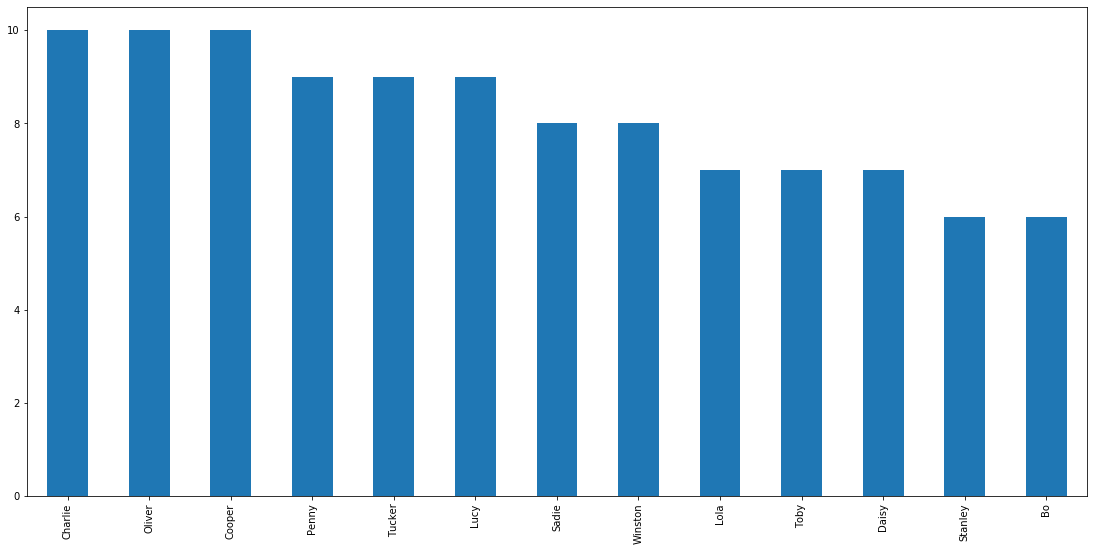

In [956]:
fig, ax = plt.subplots(figsize=(19,9))
names = df['name']

name_counts = names.value_counts().head(13)

name_counts.plot(kind = 'bar')

### Most Popular Breeds

Text(0.5, 1.0, 'Number of Favorites by Breed')

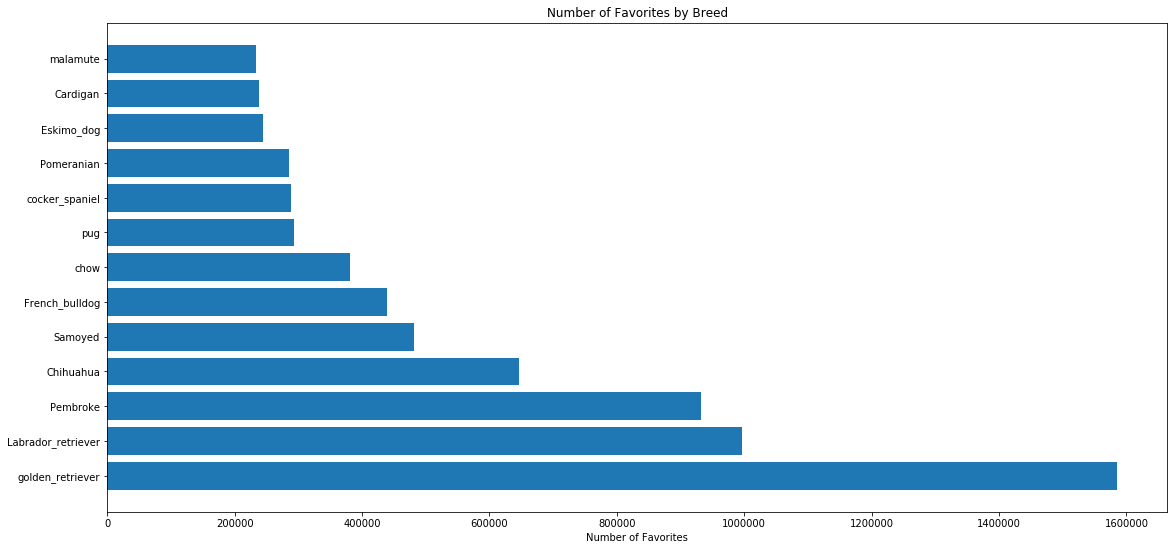

In [957]:
favorite_breeds = df.groupby('p1')['favorite_count'].sum().reset_index()
sorted_data = favorite_breeds.sort_values('favorite_count', ascending = False).head(13)
favorite = sorted_data['favorite_count']
breeds = sorted_data['p1']

fig, ax = plt.subplots(figsize=(19,9))
fav = plt.barh(breeds, favorite)

plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')

### Relation between Favorite  and Retweeted

Text(0.5, 1.0, 'Favorite vs Retweet Count')

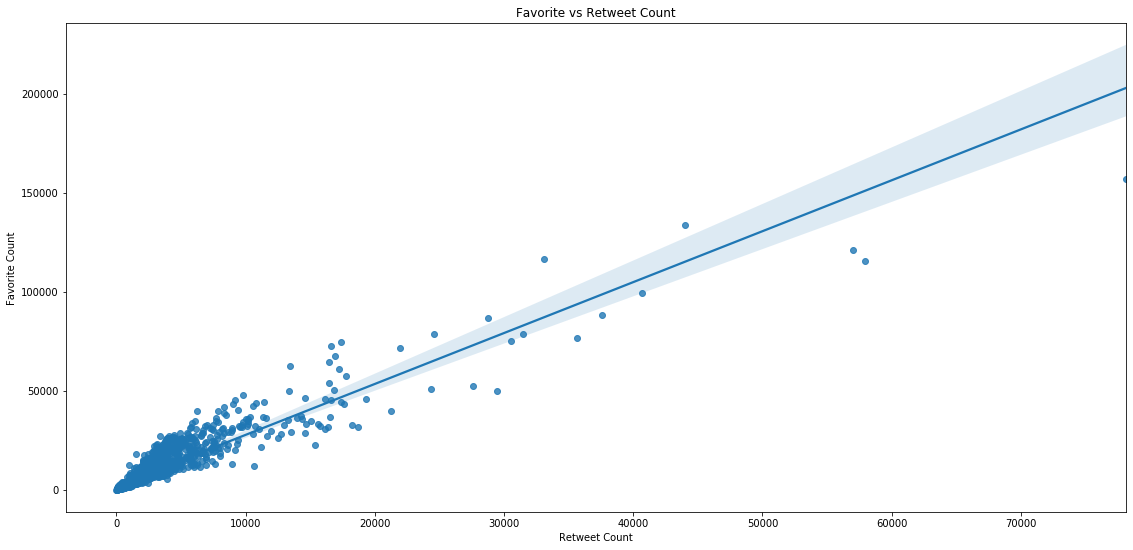

In [958]:
fig, ax = plt.subplots(figsize=(19,9))
sns.regplot(
    x='retweet_count', 
    y='favorite_count', data=df)

plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Favorite vs Retweet Count')

### How active is WeRateDogs on rating Dogs?

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Created at')

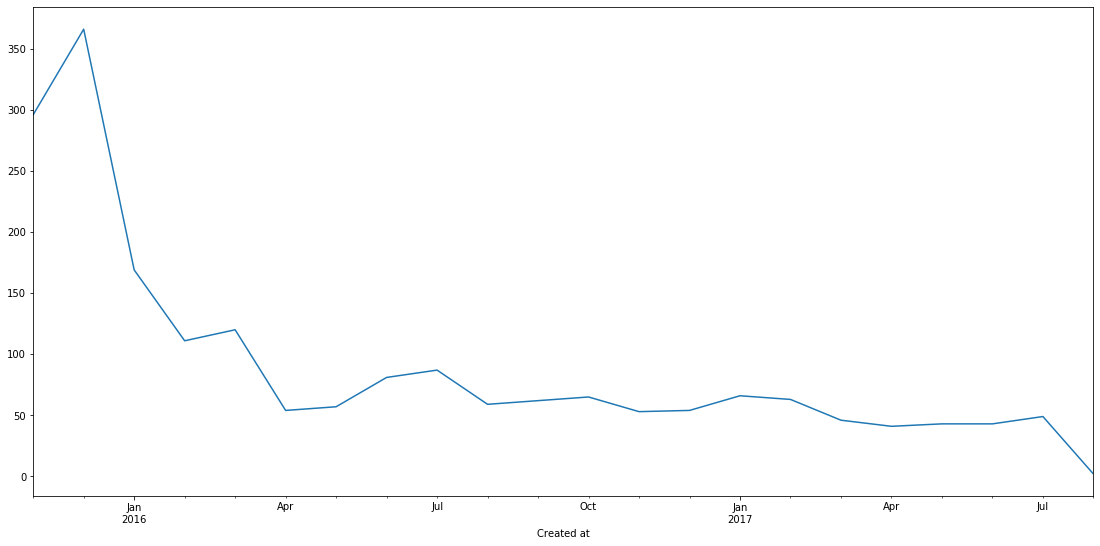

In [959]:
# Conerting datetime array to peroid array
fig, ax = plt.subplots(figsize=(19,9))
k = df.groupby(df['created_at'].dt.to_period("M")).count()['tweet_id'].plot()
plt.xlabel('Created at')

### Dog Stages

Text(0.5, 1.0, 'Proportion of Dog Stages')

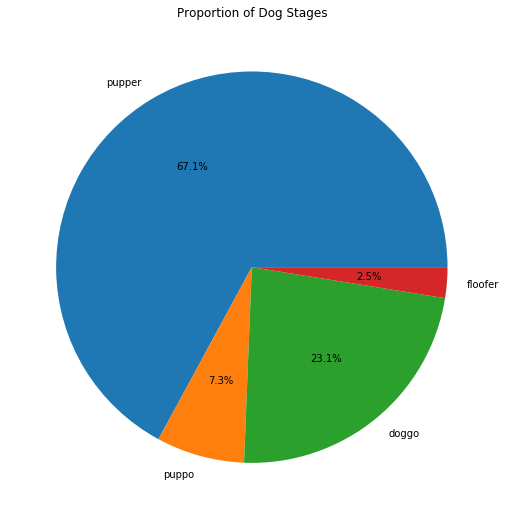

In [960]:
pupper = 0
puppo = 0
doggo = 0
floofer = 0
for item in df.dog_stage:
    item = str(item)
    if item == 'nan':
        pass
    else:
        if item.__contains__("doggo"):
            doggo += 1
        if item.__contains__("pupper"):
            pupper += 1
        if item.__contains__("puppo"):
            puppo += 1
        if item.__contains__("floofer"):
            floofer += 1 

stage = [pupper, puppo, doggo, floofer]
labels = ['pupper', 'puppo', 'doggo', 'floofer']

plt.subplots(figsize=(19, 9))

plt.pie(stage, labels = labels, autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')

### Ratings

Text(0.5, 1.0, 'Most popular scores used in Dog Ratings')

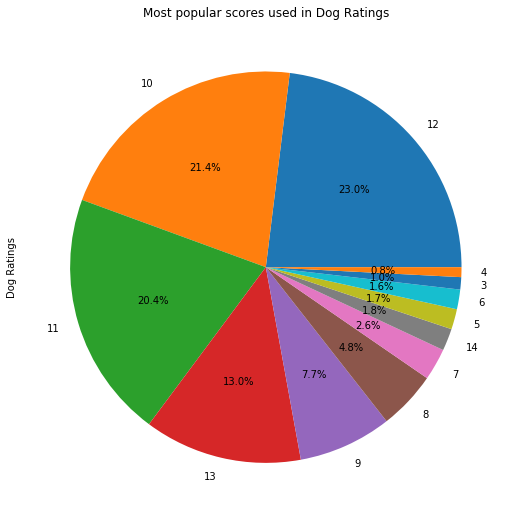

In [961]:
df_ratings = df[df.rating_numerator <= 15 ]
df_ratings = df_ratings[df_ratings.rating_numerator >= 3 ]
plt.subplots(figsize=(19, 9))

df_ratings['rating_numerator'].value_counts().plot(kind = 'pie', label = 'Dog Ratings',autopct='%1.1f%%')
plt.title('Most popular scores used in Dog Ratings')

## Conclusions

**According to above visualizatons:** 
>- **The most used dognames** are **Charlie, Lucy, Oliver, Penny and Cooper.** Other names such as Lola, Daisy, Winston, Sadie are also quiet popular.
- **Golden retrivers** are most favorites among the users with almost 1600000 favorites and the second and third popular breeds are labrador retrievers and pembrokes (about 1000000 favorites).
- There is a **linear relation** between favorited and retweeted.
- **WeRateDogs** was active in the month of january but their tweet count decreases as the time passes.
- **WeRateDogs** rated more **pupper** photos than other dog stage. They also rated doggo more than puppo and floofer. These are the names used by WeRateDogs.
- **Most used score** to rate a dog is 12 and 10. Seems like, they usually rate dogs with score between **10 to 13.**